In [26]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [27]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [28]:
NUM_CLASSES = 71

# Dataset reading

In [29]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21*2 + 21*2 + 2*1) + 1)))

In [30]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [32]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
    tf.keras.layers.Dense(90, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [34]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(100, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(50, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [35]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 90)                7830      
                                                                 
 dropout_2 (Dropout)         (None, 90)                0         
                                                                 
 dense_5 (Dense)             (None, 120)               10920     
                                                                 
 dropout_3 (Dropout)         (None, 120)               0         
                                                                 
 dense_6 (Dense)             (None, 50)                6050      
                                                                 
 dense_7 (Dense)             (None, 71)                3621      
                                                                 
Total params: 28421 (111.02 KB)
Trainable params: 2842

In [36]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [37]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [38]:
model.fit(
    X_train,
    y_train,
    epochs=50*NUM_CLASSES,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/3550
48/50 [===========================>..] - ETA: 0s - loss: 4.0612 - accuracy: 0.0487
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 3s 23ms/step - loss: 4.0452 - accuracy: 0.0510 - val_loss: 3.5061 - val_accuracy: 0.1159
Epoch 2/3550
12/50 [======>.......................] - ETA: 0s - loss: 3.5221 - accuracy: 0.1230

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


45/50 [==========================>...] - ETA: 0s - loss: 3.1740 - accuracy: 0.1550
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 1s 15ms/step - loss: 3.1299 - accuracy: 0.1595 - val_loss: 2.3816 - val_accuracy: 0.3250
Epoch 3/3550
48/50 [===========================>..] - ETA: 0s - loss: 2.3964 - accuracy: 0.2751
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 1s 14ms/step - loss: 2.3878 - accuracy: 0.2752 - val_loss: 1.8129 - val_accuracy: 0.5047
Epoch 4/3550
50/50 [==============================] - ETA: 0s - loss: 1.9943 - accuracy: 0.3676
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 1s 15ms/step - loss: 1.9943 - accuracy: 0.3676 - val_loss: 1.4936 - val_accuracy: 0.6098
Epoch 5/3550
49/50 [============================>.] - ETA: 0s - loss: 1.7288 - accuracy: 0.4410
Epoch 5: sa

46/50 [==========================>...] - ETA: 0s - loss: 0.4192 - accuracy: 0.8544
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 1s 15ms/step - loss: 0.4172 - accuracy: 0.8552 - val_loss: 0.2555 - val_accuracy: 0.9381
Epoch 30/3550
46/50 [==========================>...] - ETA: 0s - loss: 0.4107 - accuracy: 0.8614
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 1s 14ms/step - loss: 0.4076 - accuracy: 0.8598 - val_loss: 0.2428 - val_accuracy: 0.9423
Epoch 31/3550
48/50 [===========================>..] - ETA: 0s - loss: 0.4028 - accuracy: 0.8564
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 1s 14ms/step - loss: 0.4001 - accuracy: 0.8582 - val_loss: 0.2577 - val_accuracy: 0.9240
Epoch 32/3550
49/50 [============================>.] - ETA: 0s - loss: 0.3902 - accuracy: 0.8624
Epoch

Epoch 56/3550
46/50 [==========================>...] - ETA: 0s - loss: 0.2260 - accuracy: 0.9215
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 1s 14ms/step - loss: 0.2275 - accuracy: 0.9207 - val_loss: 0.1513 - val_accuracy: 0.9634
Epoch 57/3550
47/50 [===========================>..] - ETA: 0s - loss: 0.2121 - accuracy: 0.9264
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 1s 14ms/step - loss: 0.2121 - accuracy: 0.9256 - val_loss: 0.1489 - val_accuracy: 0.9620
Epoch 58/3550
49/50 [============================>.] - ETA: 0s - loss: 0.2139 - accuracy: 0.9243
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 1s 16ms/step - loss: 0.2144 - accuracy: 0.9240 - val_loss: 0.1531 - val_accuracy: 0.9526
Epoch 59/3550
40/50 [=======================>......] - ETA: 0s - loss: 0.2200 - accuracy

Epoch 83/3550
49/50 [============================>.] - ETA: 0s - loss: 0.1557 - accuracy: 0.9448
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 1s 14ms/step - loss: 0.1561 - accuracy: 0.9445 - val_loss: 0.1224 - val_accuracy: 0.9780
Epoch 84/3550
49/50 [============================>.] - ETA: 0s - loss: 0.1544 - accuracy: 0.9461
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 1s 14ms/step - loss: 0.1543 - accuracy: 0.9457 - val_loss: 0.1095 - val_accuracy: 0.9756
Epoch 85/3550
47/50 [===========================>..] - ETA: 0s - loss: 0.1573 - accuracy: 0.9476
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 1s 14ms/step - loss: 0.1566 - accuracy: 0.9479 - val_loss: 0.1179 - val_accuracy: 0.9775
Epoch 86/3550
46/50 [==========================>...] - ETA: 0s - loss: 0.1359 - accuracy

Epoch 110/3550
49/50 [============================>.] - ETA: 0s - loss: 0.1191 - accuracy: 0.9611
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 1s 14ms/step - loss: 0.1183 - accuracy: 0.9611 - val_loss: 0.0892 - val_accuracy: 0.9845
Epoch 111/3550
47/50 [===========================>..] - ETA: 0s - loss: 0.1042 - accuracy: 0.9664
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 1s 14ms/step - loss: 0.1048 - accuracy: 0.9658 - val_loss: 0.0943 - val_accuracy: 0.9836
Epoch 112/3550
49/50 [============================>.] - ETA: 0s - loss: 0.1025 - accuracy: 0.9664
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 1s 14ms/step - loss: 0.1024 - accuracy: 0.9662 - val_loss: 0.0920 - val_accuracy: 0.9831
Epoch 113/3550
48/50 [===========================>..] - ETA: 0s - loss: 0.1060 - a

Epoch 137/3550
48/50 [===========================>..] - ETA: 0s - loss: 0.0940 - accuracy: 0.9694
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 1s 14ms/step - loss: 0.0926 - accuracy: 0.9698 - val_loss: 0.0863 - val_accuracy: 0.9878
Epoch 138/3550
48/50 [===========================>..] - ETA: 0s - loss: 0.0941 - accuracy: 0.9701
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 1s 15ms/step - loss: 0.0930 - accuracy: 0.9703 - val_loss: 0.0866 - val_accuracy: 0.9878
Epoch 139/3550
48/50 [===========================>..] - ETA: 0s - loss: 0.0799 - accuracy: 0.9743
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 1s 14ms/step - loss: 0.0805 - accuracy: 0.9739 - val_loss: 0.0777 - val_accuracy: 0.9897
Epoch 140/3550
47/50 [===========================>..] - ETA: 0s - loss: 0.0771 - a

Epoch 164/3550
47/50 [===========================>..] - ETA: 0s - loss: 0.0625 - accuracy: 0.9794
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 1s 14ms/step - loss: 0.0608 - accuracy: 0.9795 - val_loss: 0.0807 - val_accuracy: 0.9897
Epoch 165/3550
49/50 [============================>.] - ETA: 0s - loss: 0.0660 - accuracy: 0.9780
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 1s 14ms/step - loss: 0.0659 - accuracy: 0.9781 - val_loss: 0.0805 - val_accuracy: 0.9883
Epoch 166/3550
48/50 [===========================>..] - ETA: 0s - loss: 0.0705 - accuracy: 0.9762
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
50/50 [==============================] - 1s 14ms/step - loss: 0.0697 - accuracy: 0.9765 - val_loss: 0.0747 - val_accuracy: 0.9897
Epoch 167/3550
46/50 [==========================>...] - ETA: 0s - loss: 0.0743 - a

In [39]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

17/17 [==============================] - 0s 5ms/step - loss: 0.0770 - accuracy: 0.9902


In [40]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [41]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 173ms/step
[4.97138734e-13 8.19166834e-16 9.63972738e-12 1.81294512e-04
 5.25819877e-09 2.44161811e-08 1.89900509e-11 8.69887773e-11
 7.12164272e-10 2.14848782e-07 5.90851881e-11 3.20831305e-07
 4.09778439e-13 9.80282744e-10 2.96740232e-09 4.32316145e-18
 7.64147990e-06 1.27531950e-13 1.92607800e-12 1.55236890e-08
 9.99694109e-01 7.44881973e-23 8.64655938e-29 1.02457244e-16
 4.65681604e-10 1.09707656e-07 3.43592182e-10 1.20187346e-10
 4.92973067e-12 2.01103561e-11 1.69600172e-23 8.23120188e-23
 1.08141318e-16 2.29283318e-21 1.21358635e-15 7.93935772e-14
 1.05230662e-04 1.36382333e-12 1.77896960e-14 6.63542066e-09
 3.72422785e-17 7.96509380e-15 6.51027054e-09 5.29633178e-11
 8.34433390e-12 8.16829677e-12 1.09654143e-25 4.91255199e-20
 6.73132562e-22 5.11984965e-14 2.12976507e-14 4.48700700e-22
 7.37199635e-13 2.30111212e-07 5.89436474e-24 5.16257792e-09
 1.32155838e-15 1.52377382e-14 8.26029918e-15 5.94566516e-19
 5.14749077e-18 2.48096205e-12 1

# Confusion matrix

67/67 [==============================] - 0s 3ms/step


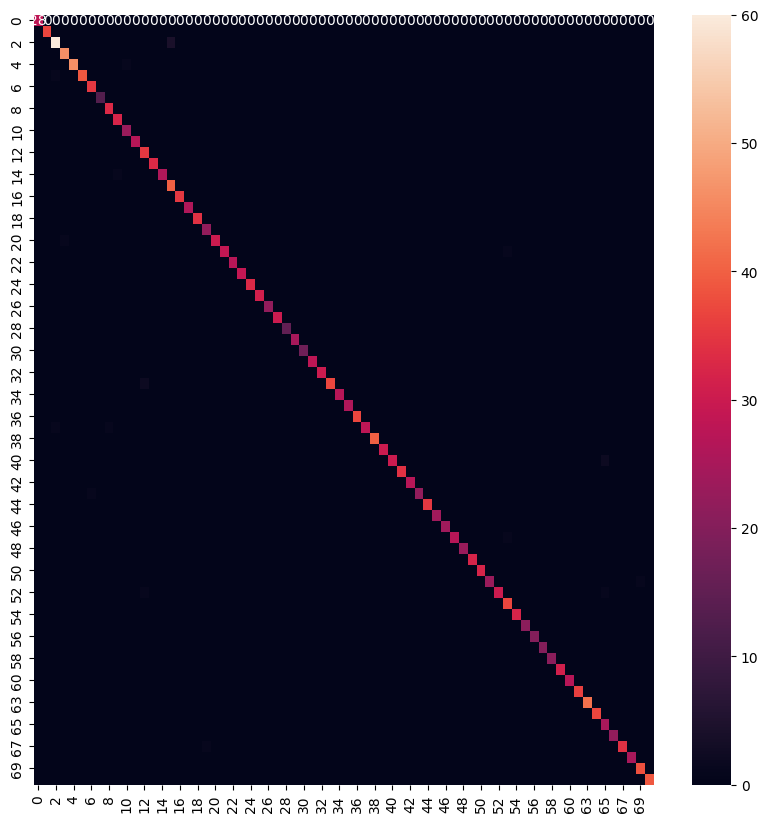

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        37
           2       0.97      0.94      0.95        64
           3       0.98      1.00      0.99        46
           4       1.00      0.98      0.99        47
           5       1.00      0.97      0.99        40
           6       0.97      1.00      0.99        35
           7       1.00      1.00      1.00        13
           8       0.97      1.00      0.99        33
           9       0.97      1.00      0.98        32
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        27
          12       0.92      1.00      0.96        35
          13       1.00      1.00      1.00        33
          14       1.00      0.96      0.98        27
          15       0.91      1.00      0.95        40
          16       1.00      1.00      1.00        35
     

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [43]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [44]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmp7syxr2ks\assets


INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmp7syxr2ks\assets


32144

# Inference test

In [45]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [46]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [47]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [48]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1.24 ms


In [49]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.17410333e-13 8.16583966e-16 9.80516189e-12 1.34590198e-04
 5.03514741e-09 2.23877912e-08 1.93918111e-11 9.81094511e-11
 7.25517257e-10 2.95727318e-07 9.03419908e-11 3.24298981e-07
 3.79911841e-13 9.40401756e-10 3.41758510e-09 4.88818288e-18
 7.12341352e-06 1.08076383e-13 1.73180003e-12 1.52976938e-08
 9.99732792e-01 9.92278472e-23 9.87574084e-29 1.01611125e-16
 4.05213807e-10 1.34043916e-07 4.02663597e-10 1.15277309e-10
 5.75913406e-12 2.22309966e-11 2.04520788e-23 1.06994972e-22
 1.93327065e-16 3.24110811e-21 1.29602267e-15 8.54853501e-14
 1.14801514e-04 1.36775519e-12 2.08028378e-14 6.47075815e-09
 3.78290705e-17 1.14048184e-14 5.82194204e-09 6.12874543e-11
 8.63137947e-12 8.48416996e-12 1.74680305e-25 5.17667140e-20
 9.09320193e-22 5.28580035e-14 2.61322946e-14 4.83740210e-22
 8.05613714e-13 2.86574334e-07 7.83936047e-24 4.55681270e-09
 1.73717659e-15 1.47080122e-14 7.99889550e-15 1.03118279e-18
 5.02857818e-18 2.39658293e-12 1.41217678e-08 9.03716864e-06
 2.51824960e-16 5.079999